**Data Summary Table**

In [27]:
import pandas as pd
df = pd.read_csv("Cleaned_DataCoSupplyChain_Dataset.csv")

# Summary table
summary_table = pd.DataFrame({
    'Column': df.columns,
    'Type': [df[col].dtype for col in df.columns],
    'Nulls': [df[col].isnull().sum() for col in df.columns],
    'Unique Values': [df[col].nunique() for col in df.columns]
})

summary_table

,Column,Type,Nulls,Unique Values
0,Order_Id,int64,0,1999
1,Type,object,0,4
2,Order_Date(DateOrders),object,0,24
3,Shipping_Date(DateOrders),object,0,30
4,Days_for_Shipment(scheduled),int64,0,4
5,Days_for_Shipping(real),int64,0,7
6,Delivery_Status,object,0,4
7,Late_Delivery_Risk,int64,0,2
8,Shipping_Mode,object,0,4
9,Order_Item_Quantity,int64,0,1


**Delivery Status Distribution**

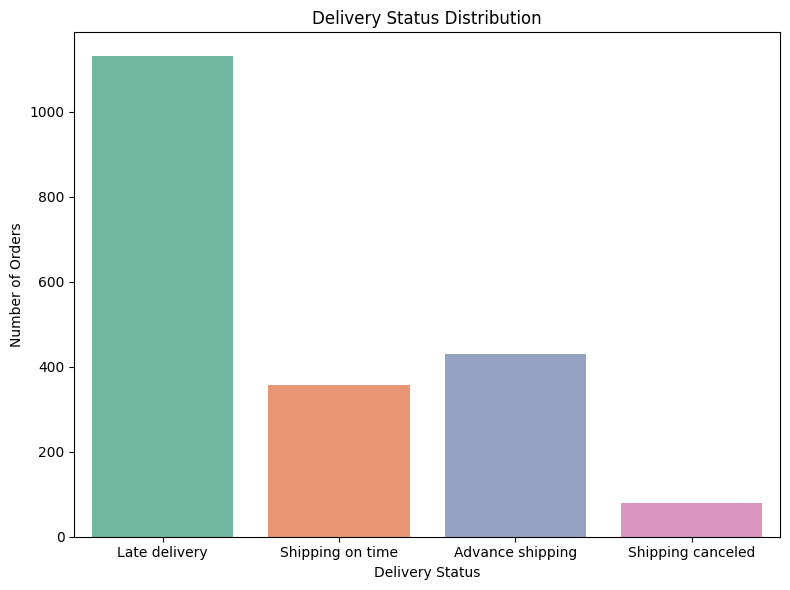

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Documentation folder
output_dir = './documentation'
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(8,6))
sns.countplot(x='Delivery_Status', data=df, hue='Delivery_Status', palette='Set2', legend=False)
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(f'{output_dir}/delivery_status.png')
plt.show()

**Order Type Breakdown**

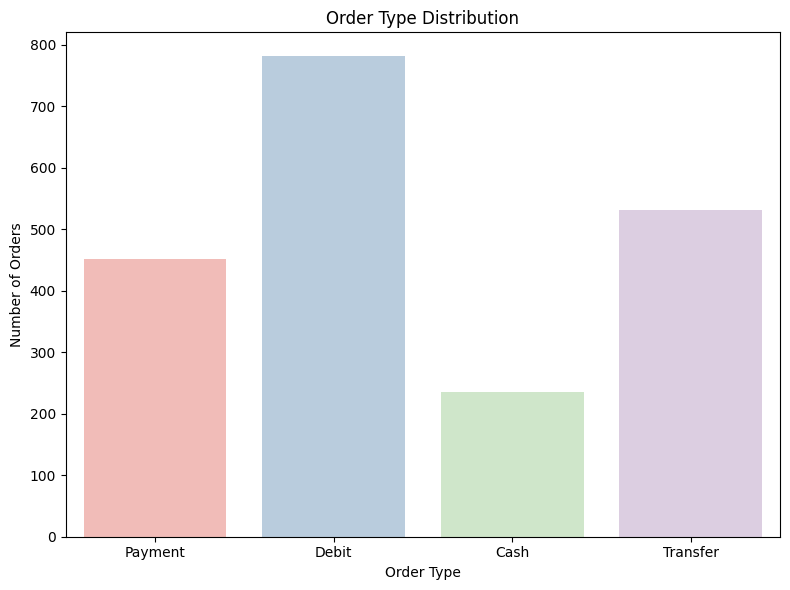

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='Type', data=df, hue='Type', palette='Pastel1', legend=False)
plt.title('Order Type Distribution')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig('./documentation/order_type.png')
plt.show()

**Shipping Method Trends**

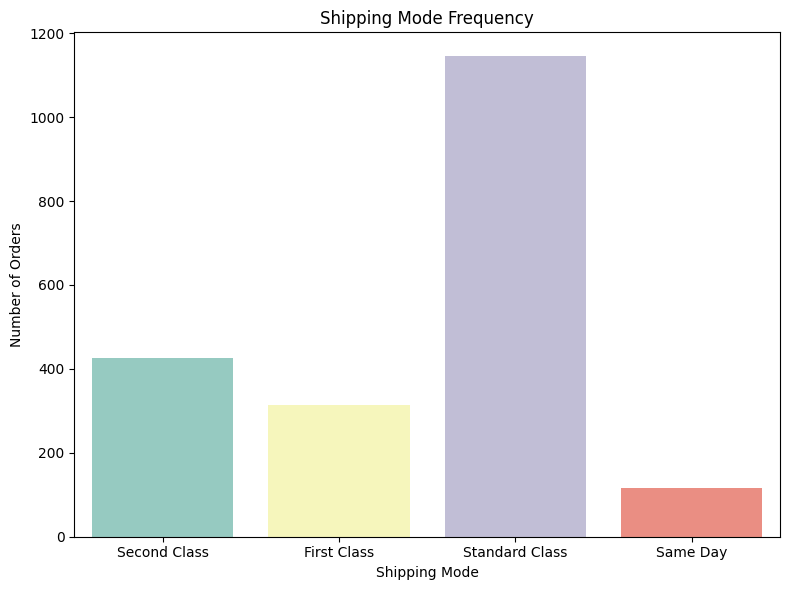

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='Shipping_Mode', data=df, hue='Shipping_Mode', palette='Set3', legend=False)
plt.title('Shipping Mode Frequency')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(f'{output_dir}/shipping_mode.png')
plt.show()

**Customer Segment Distribution**

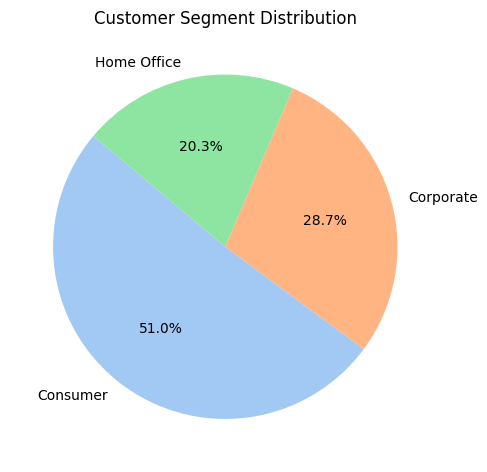

In [31]:
segment_counts = df['Customer_Segment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Segment Distribution')
plt.tight_layout()
plt.savefig('./documentation/customer_segment.png')
plt.show()

**Correlation Insights**

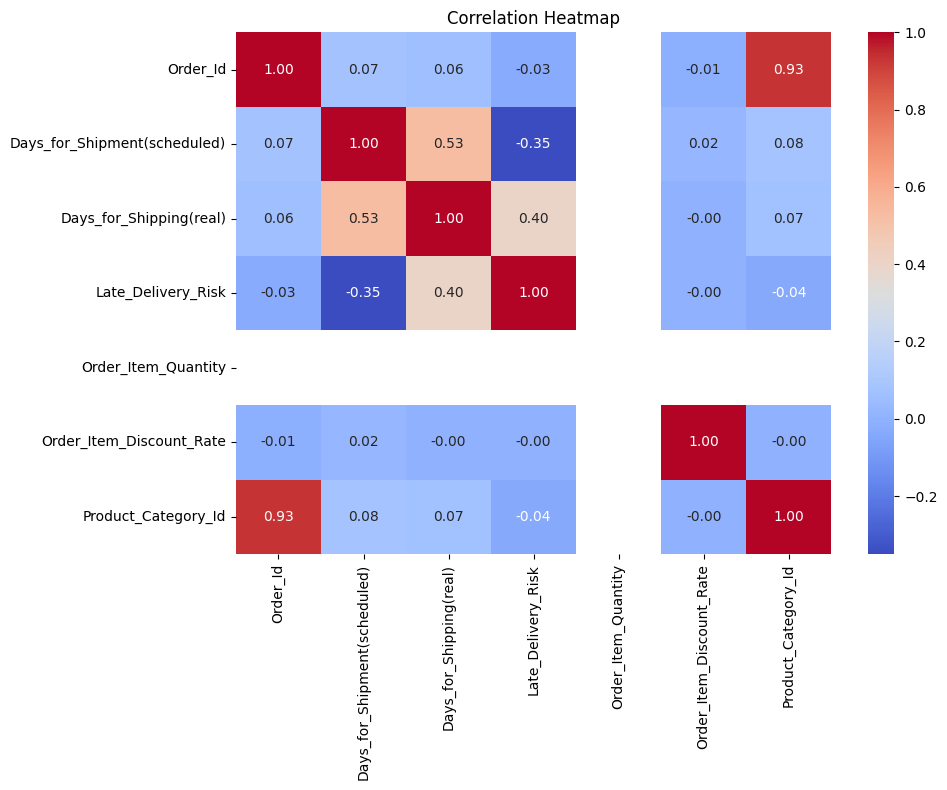

In [35]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('./documentation/correlation_heatmap.png')
plt.show()

**Order Volume Over Time**

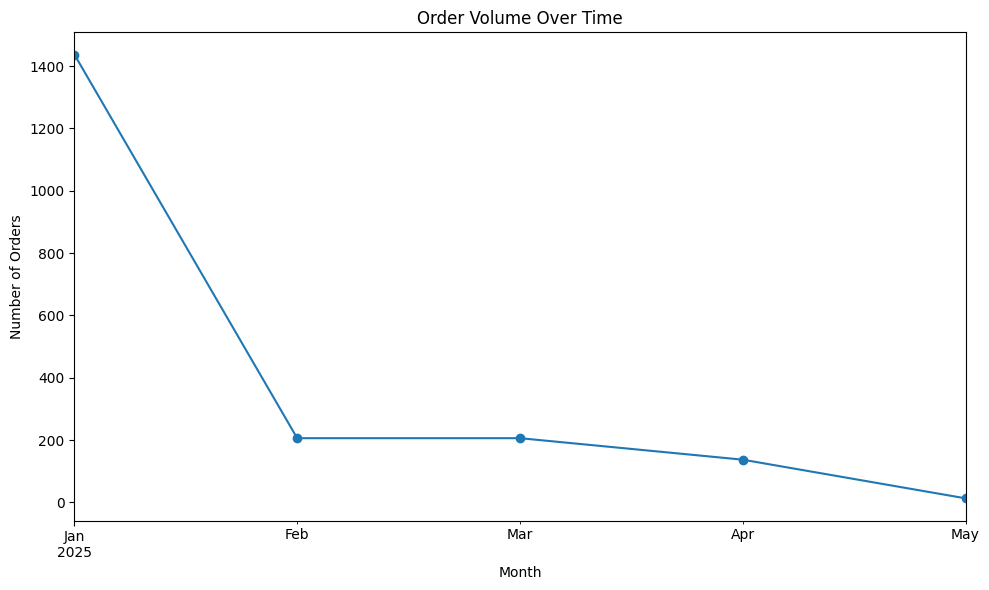

In [33]:
# Date parsing for DD-MM-YYYY format
df['Order_Date(DateOrders)'] = pd.to_datetime(df['Order_Date(DateOrders)'], dayfirst=True, errors='coerce')

# Grouping and plotting
df['Order_Month'] = df['Order_Date(DateOrders)'].dt.to_period('M')
monthly_orders = df.groupby('Order_Month').size()

plt.figure(figsize=(10,6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Order Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.savefig(f'{output_dir}/order_volume_over_time.png')
plt.show()